In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import seaborn as sns
from scipy.stats import skew
import statsmodels.api as sm
import datetime as dt

In [2]:
gdf_districts = gpd.read_file(r"C:\Users\basde\Syntra\BELGIUM_-_Municipalities\BELGIUM_-_Municipalities.shp")
AtheleteEvents = pd.read_csv(r"C:\Users\basde\Syntra\athlete_events.csv")
HistoricalData = pd.read_csv(r"C:\Users\basde\Syntra\HistoricalData.csv", delimiter=';')
Ongeval = pd.read_csv(r"C:\Users\basde\Syntra\ongeval_per_gemeente.csv", delimiter=';')

In [3]:
gdf_merged = gdf_districts.merge(Ongeval, left_on='Communes', right_on='gemeente', how='left')

C:\Users\basde\AppData\Local\Temp\ipykernel_18568\1544764530.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('RdYlGn_r') # Red to green colormap (reversed)


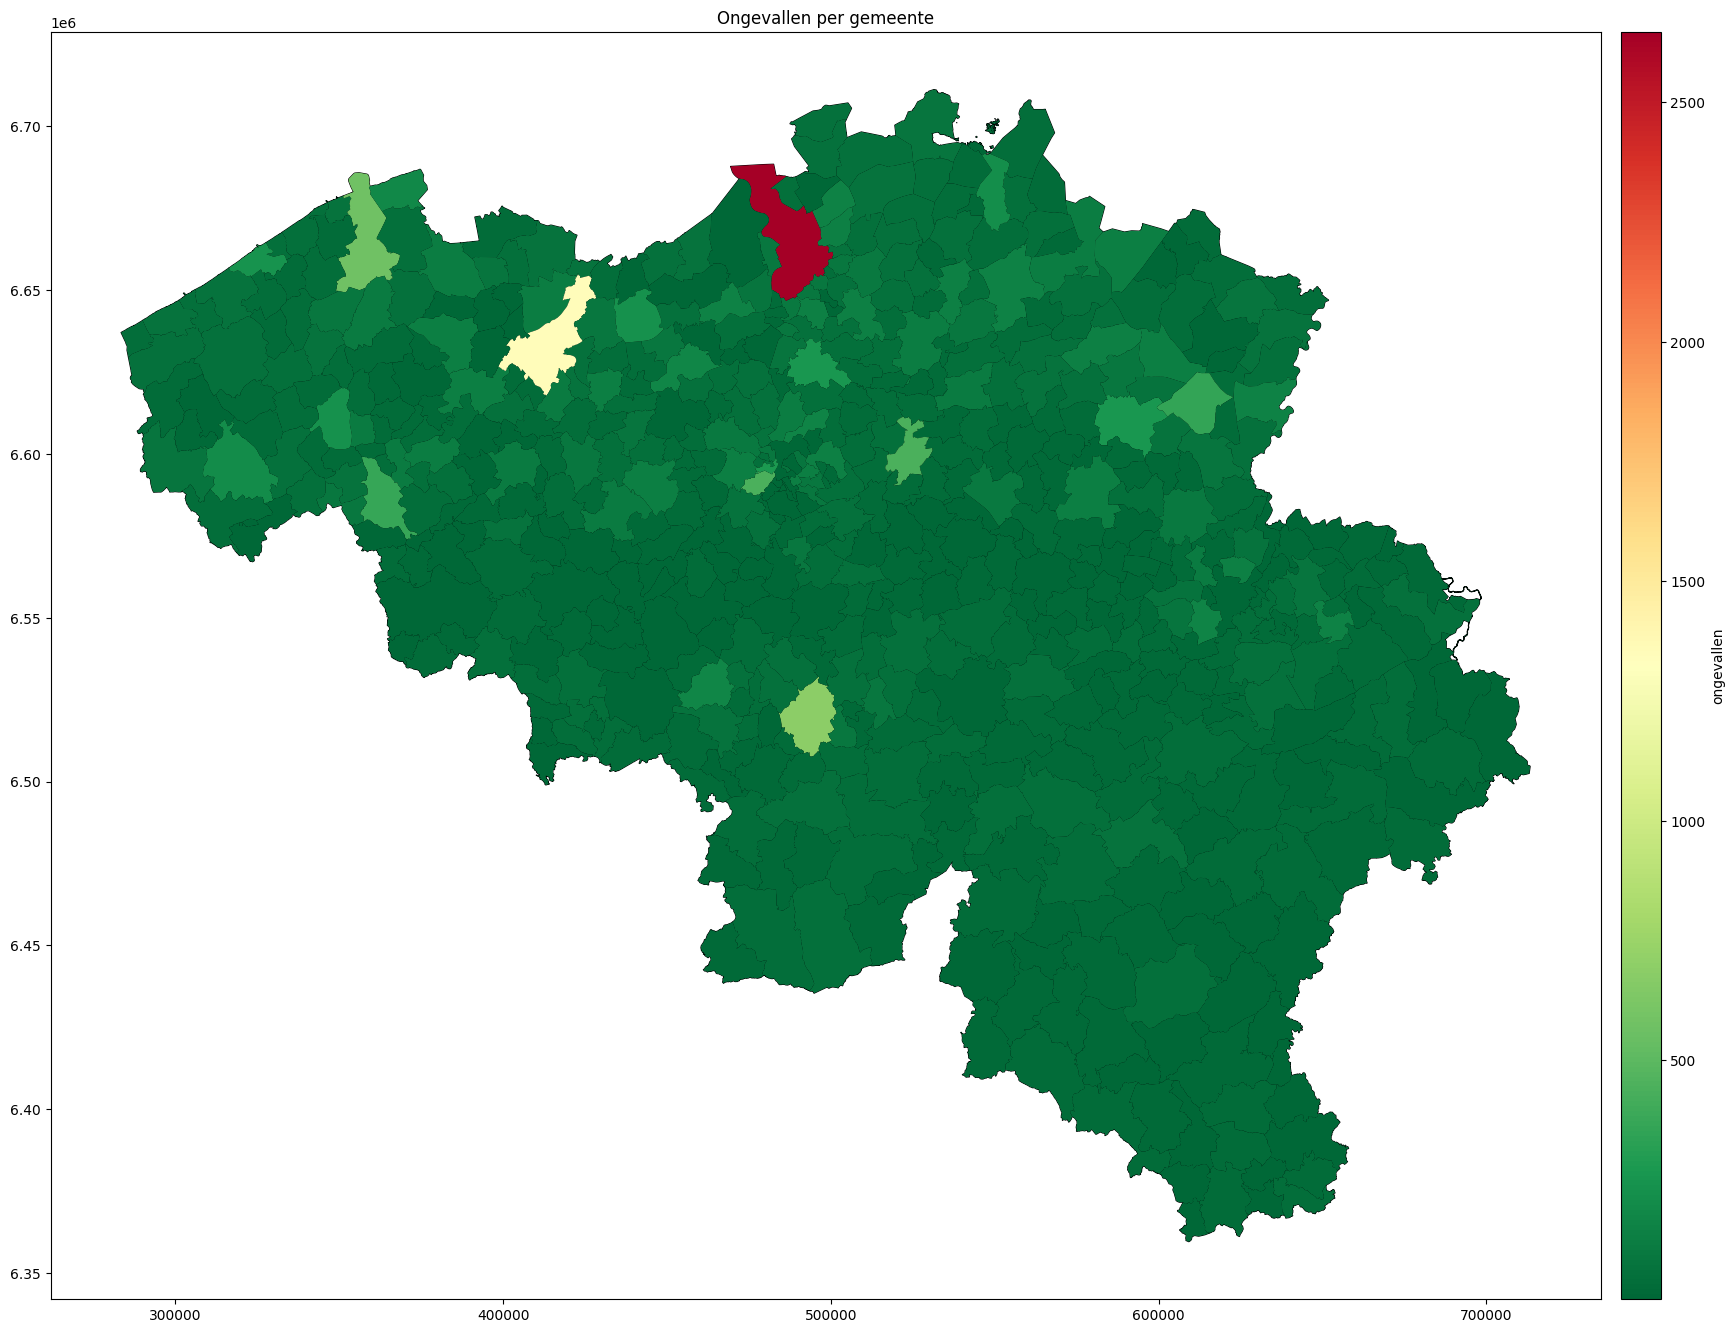

In [20]:
# Define color scale
cmap = plt.cm.get_cmap('RdYlGn_r') # Red to green colormap (reversed)
cmap.set_bad('white') # Set NaN values to white
normalize = colors.Normalize(vmin=gdf_merged['ongeval'].min(), vmax=gdf_merged['ongeval'].max())
# Plot the map
fig, ax = plt.subplots(figsize=(20, 20))
gdf_districts.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=0.8) # Plot the district outlines
# Fill districts with color based on population values
infes_values = gdf_merged['ongeval'].fillna(np.nanmin(gdf_merged['ongeval']) - 1) # Replace NaN values with a valuelower than min
gdf_districts.plot(ax=ax, column=infes_values, cmap=cmap, linewidth=0, legend=False)
# Set plot title and axis labels
ax.set_title('Ongevallen per gemeente')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Create and add colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])
cax = fig.add_axes([ax.get_position().x1+0.01,ax.get_position().y0,0.02,ax.get_position().height])
cbar = fig.colorbar(sm,cax=cax)
cbar.set_label('ongevallen')

# Show the plot
plt.show()

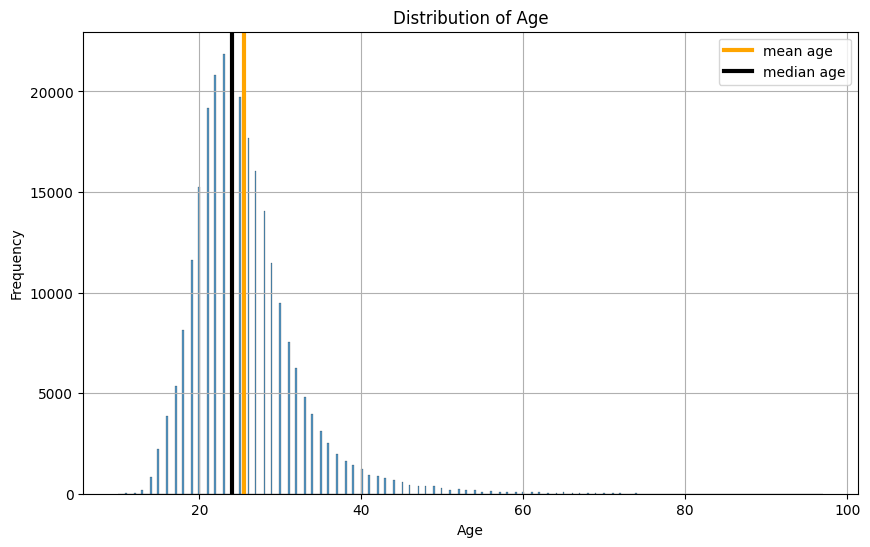

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=AtheleteEvents, x='Age')

median_price = AtheleteEvents["Age"].median(axis=0)
mean_price = AtheleteEvents["Age"].mean(axis=0)
plt.axvline(mean_price, color='orange', label='mean age', linewidth=3)
plt.axvline(median_price, color='black', label='median age', linewidth=3)

plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.grid(True)

In [8]:
 print(skew(AtheleteEvents["Age"], nan_policy='omit'))
# The data is positively/left skewed

1.7471125214748489


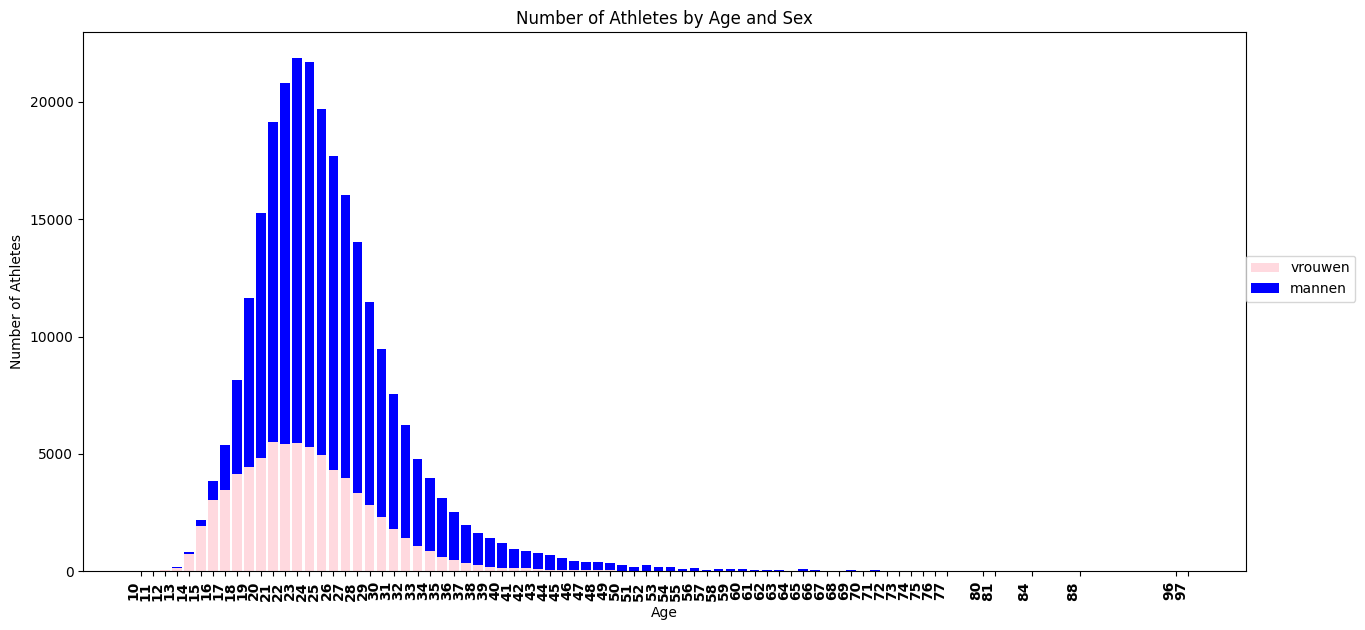

In [9]:
age_sex_counts = AtheleteEvents.groupby(['Age', 'Sex']).size()
age_sex_counts_unstacked = age_sex_counts.unstack(fill_value=0)
age_sex_counts_unstacked = age_sex_counts_unstacked.sort_index()

ages = age_sex_counts_unstacked.index 
female_counts = age_sex_counts_unstacked['F'] 
male_counts = age_sex_counts_unstacked['M']

plt.figure(figsize=(15, 7))

plt.bar(ages, female_counts, label='vrouwen', color='pink', alpha=0.6)
plt.bar(ages, male_counts, bottom=female_counts, label='mannen', color='blue')
plt.xticks(ages, rotation=90, fontweight='bold', fontsize='10', horizontalalignment='right') # Use the actual ages for ticks
plt.ylabel('Number of Athletes') # Corrected y-axis label
plt.xlabel('Age') # Added x-axis label
plt.title('Number of Athletes by Age and Sex') # Corrected title
plt.legend(loc=(1.0, 0.5))
plt.show()

In [10]:
# Vrouwen beginnen blijkbaar veel vroeger, maar na circa 20 jaar komen er veel meer mannen bij.
# De mannen lijken ook veel langer nog mee te doen.

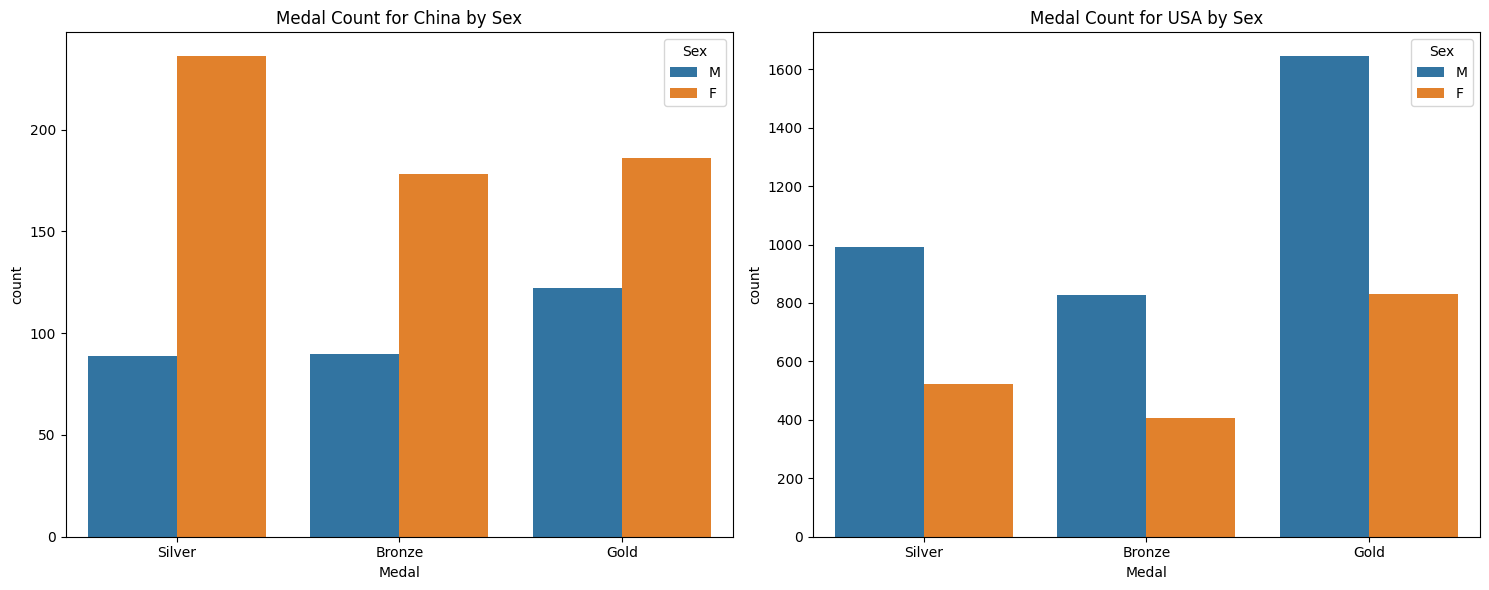

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(data=AtheleteEvents[AtheleteEvents['Team'] == 'China'], x='Medal', hue='Sex', ax=ax[0])
ax[0].set_title('Medal Count for China by Sex')

sns.countplot(data=AtheleteEvents[AtheleteEvents['Team'] == 'United States'], x='Medal', hue='Sex', ax=ax[1])
ax[1].set_title('Medal Count for USA by Sex')

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Show the plot
plt.show()

In [12]:
AtheleteEvents[(AtheleteEvents['Sex'] == 'F') &((AtheleteEvents['Team'] == 'China') |  (AtheleteEvents['Team'] == 'United States')) &(AtheleteEvents['Medal'].notna())]['Team'].value_counts()

Team
United States    1756
China             600
Name: count, dtype: int64

In [13]:
AtheleteEvents[(AtheleteEvents['Team'] == 'China') | (AtheleteEvents['Team'] == 'United States')]['Team'].value_counts()
# USA heeft veel meer medailes omdat ze vroeger zijn begonnen en dus veel meer deelnames hebben.

Team
United States    17847
China             4975
Name: count, dtype: int64

In [14]:
AtheleteEventsCU = AtheleteEvents[(AtheleteEvents['Team'] == 'China') | (AtheleteEvents['Team'] == 'United States')]

<function matplotlib.pyplot.show(close=None, block=None)>

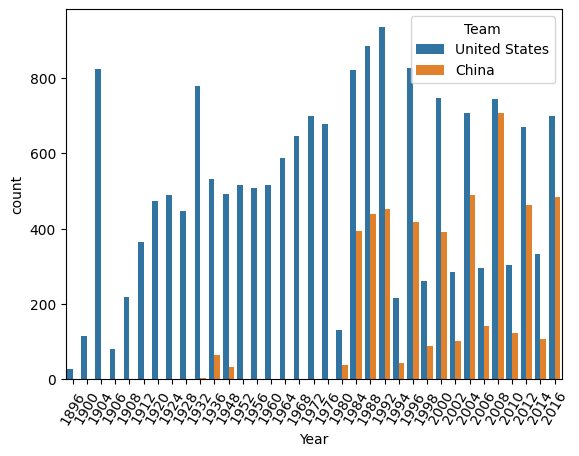

In [15]:
sns.countplot(data=AtheleteEventsCU, x='Year', hue='Team')
plt.xticks(rotation=60)
plt.show

# Usa is veel vroeger beginnen meedoen.

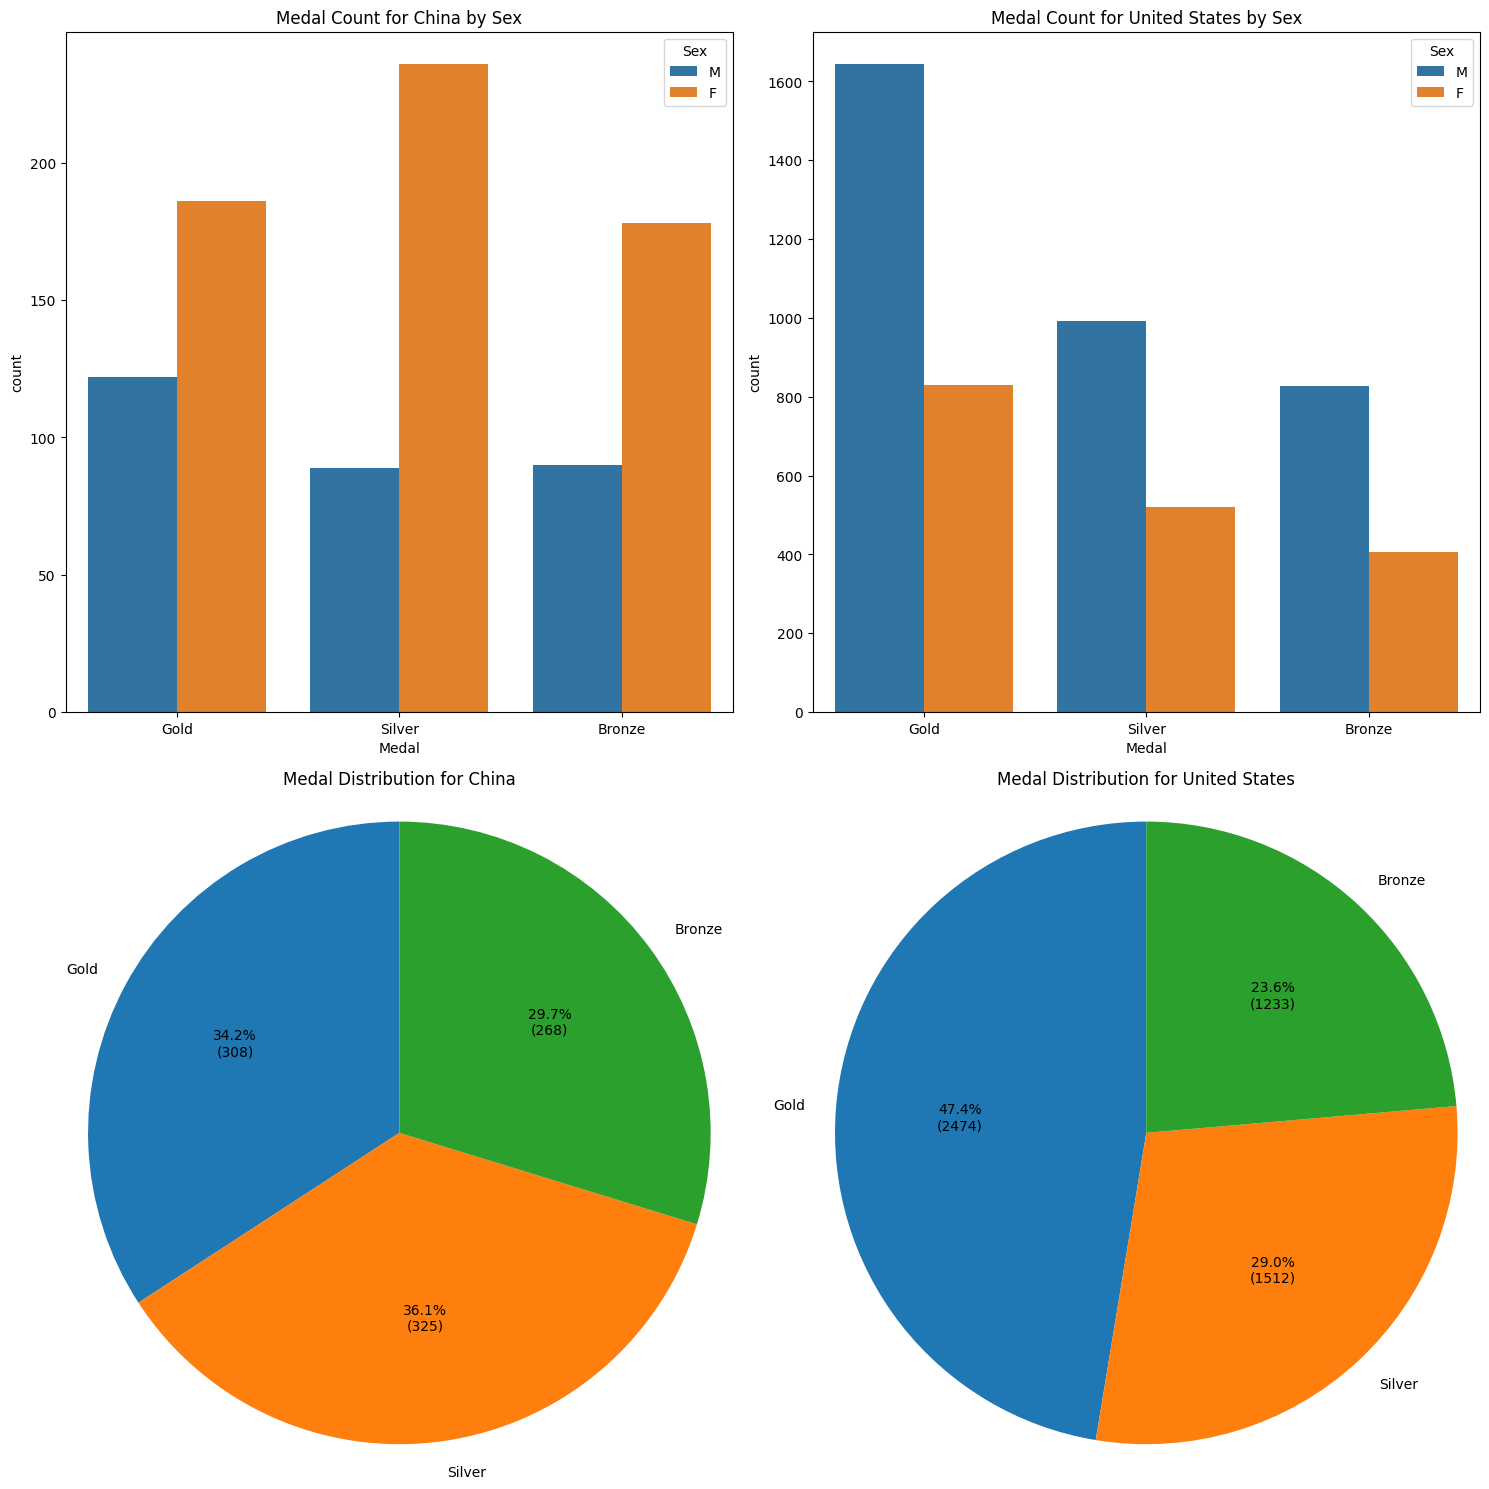

In [17]:

medal_order = ['Gold', 'Silver', 'Bronze']

default_seaborn_colors = sns.color_palette(n_colors=len(medal_order))
medal_colors = {medal_order[i]: default_seaborn_colors[i] for i in range(len(medal_order))}

# Create the list of colors in the desired order for the pie chart
pie_colors = [medal_colors['Gold'], medal_colors['Silver'], medal_colors['Bronze']]


# Modified fmt function to take total as an argument
def fmt(x, total):
    # This function calculates the count from the percentage and total
    count = total * x / 100
    return '{:.1f}%\n({:.0f})'.format(x, count)

fig, ax = plt.subplots(2, 2, figsize=(15, 15))

# Countplot for China (already ordered by 'order')
sns.countplot(data=AtheleteEvents[(AtheleteEvents['Team'] == 'China') & AtheleteEvents['Medal'].notna()],
              x='Medal', hue='Sex', ax=ax[0, 0], order=medal_order)
ax[0, 0].set_title('Medal Count for China by Sex')

# Countplot for United States (already ordered by 'order')
sns.countplot(data=AtheleteEvents[(AtheleteEvents['Team'] == 'United States') & AtheleteEvents['Medal'].notna()],
              x='Medal', hue='Sex', ax=ax[0, 1], order=medal_order)
ax[0, 1].set_title('Medal Count for United States by Sex')

# --- Pie Chart for China ---
china_medal_counts = AtheleteEvents[(AtheleteEvents['Team'] == 'China') & AtheleteEvents['Medal'].notna()]['Medal'].value_counts()
# Reindex the counts to ensure the desired order ('Gold', 'Silver', 'Bronze')
china_medal_counts_ordered = china_medal_counts.reindex(medal_order, fill_value=0) # Use fill_value=0 in case a medal type is missing
china_pie_values = china_medal_counts_ordered.values
china_pie_labels = china_medal_counts_ordered.index
china_total = china_pie_values.sum() # Total for China's pie chart

# Use a lambda function to pass the correct total to fmt
autopct_china = lambda pct: fmt(pct, china_total)

ax[1, 0].pie(china_pie_values, labels=china_pie_labels, autopct=autopct_china,
             startangle=90, colors=pie_colors) # Use the determined pie_colors
ax[1, 0].set_title('Medal Distribution for China')
ax[1, 0].axis('equal')

# --- Pie Chart for United States ---
usa_medal_counts = AtheleteEvents[(AtheleteEvents['Team'] == 'United States') & AtheleteEvents['Medal'].notna()]['Medal'].value_counts()
# Reindex the counts to ensure the desired order ('Gold', 'Silver', 'Bronze')
usa_medal_counts_ordered = usa_medal_counts.reindex(medal_order, fill_value=0) # Use fill_value=0 in case a medal type is missing
usa_pie_values = usa_medal_counts_ordered.values
usa_pie_labels = usa_medal_counts_ordered.index
usa_total = usa_pie_values.sum() # Total for USA's pie chart

# Use a lambda function to pass the correct total to fmt
autopct_usa = lambda pct: fmt(pct, usa_total)

ax[1, 1].pie(usa_pie_values, labels=usa_pie_labels, autopct=autopct_usa,
             startangle=90, colors=pie_colors) # Use the determined pie_colors
ax[1, 1].set_title('Medal Distribution for United States')
ax[1, 1].axis('equal')

plt.tight_layout()
plt.show()

In [18]:
HistoricalData['Date'] = pd.to_datetime(HistoricalData[['year', 'month', 'day']])
HistoricalData = HistoricalData.set_index('Date')

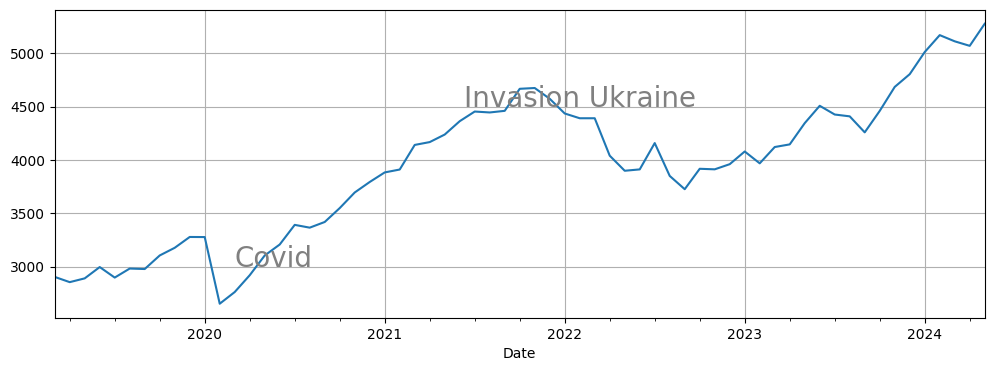

In [21]:
fig, ax = plt.subplots(figsize=(12, 4))
HistoricalData['price'].plot(ax=ax)
style = dict(size=20, color='gray')
ax.text('2020, 3, 1', 3000, "Covid",**style)
ax.text('2022, 2, 24', 4500 ,"Invasion Ukraine",**style, ha='center')
plt.grid()